### Installs

In [1]:
# pip install seaborn
# pip install numpy==1.23.5
# pip install gym
# pip install scikit-learn
# python version: 3.9.6

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning


In [6]:
# Functions
def distributionOfData(data):
    # Define bins
    bin_edges = np.arange(0, 11, 1)  # Bin edges at integer intervals (-4 to 4)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

    # Create the histogram
    plt.hist(data, bins=bin_edges, color='blue', edgecolor='black', alpha=0.7, label="Data Distribution")

    # Add labels and title
    plt.xlabel('Value Ranges (Standard Deviations)', fontsize=12)
    plt.ylabel('Frequency (Count of Data Points)', fontsize=12)
    plt.title('Histogram of Randomly Generated Data', fontsize=14)

    # Set x-axis ticks at bin centers
    plt.xticks(bin_centers, labels=[f"{x}" for x in bin_edges[:-1]])

    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

def showDigitsData(X_data, y_data):
    # Print data
    print("Example of Data:")

    plt.imshow(X_data[0].reshape(8, 8), cmap="gray")
    plt.title(f"Example Image (Label: {y_data[0]})")
    plt.show()

def showNumericalDigitsData(digits):
    for i in range(3):
        print(f"Y-value: {digits.target[i]}")
        print(f"X-Value: {digits.data[i]}\n")

def filteredDigits():
        # Load the digits dataset
    digits = load_digits()

    # Extract the labels (target) from the dataset
    y = digits.target

    # Use np.where to find the indices of labels that are less than 5
    indices_less_than_5 = np.where(y < 5)
    
    return digits.data[indices_less_than_5], digits.target[indices_less_than_5], 

def allDigits():
    digits = load_digits()
    return digits.data, digits.target

def supervisedModel(X_train, X_test, y_test, y_train, epochs=10, batch_size=64):
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    # Scale data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define MLP model (warm_start=True allows incremental training)
    model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1, warm_start=True, verbose=False, batch_size=batch_size)

    # Lists to store accuracy values
    train_accuracies = []
    test_accuracies = []

    # Training loop
    for epoch in range(epochs):

        model.fit(X_train, y_train)
        
        train_acc = accuracy_score(y_train, model.predict(X_train))
        test_acc = accuracy_score(y_test, model.predict(X_test))
        
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        
        print(f"Epoch {epoch+1}/{epochs} - Training Accuracy: {train_acc:.4f}, Testing Accuracy: {test_acc:.4f}")
    return model, train_accuracies, test_accuracies

def graphAccuracies(train_accuracies, test_accuracies):
    epochs = range(1, len(train_accuracies) + 1)  # Create an epoch range
    
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_accuracies, label="Training Accuracy", marker='o')
    plt.plot(epochs, test_accuracies, label="Testing Accuracy", marker='s')
    
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs Testing Accuracy Over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()

def showCorrectPredictions(model, X_test, y_test):
    model_preds = model.predict(X_test)
    correct_indices = np.where(model_preds == y_test)[0][:10]  # Select 10 correctly classified digits

    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test[correct_indices[i]].reshape(8, 8), cmap='gray')
        ax.set_title(f"Pred: {model_preds[correct_indices[i]]}, True: {y_test[correct_indices[i]]}")
        ax.axis('off')
    plt.show()

def showIncorrectPredictions(model, X_test, y_test):
    model_preds = model.predict(X_test)
    incorrect_indices = np.where(model_preds != y_test)[0][:10]  # Select 10 correctly classified digits

    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X_test[incorrect_indices[i]].reshape(8, 8), cmap='gray')
        ax.set_title(f"Pred: {model_preds[incorrect_indices[i]]}, True: {y_test[incorrect_indices[i]]}")
        ax.axis('off')
    plt.show()

def showFeatureImportance(model, X_test, y_test):
    
    # Assuming 'model' is your trained MLPClassifier model
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    # Get the feature importances
    importances = result.importances_mean

    norm_importances = (importances - np.min(importances)) / (np.max(importances) - np.min(importances))

    importance_matrix = norm_importances.reshape(8, 8)
    fig, ax = plt.subplots(figsize=(8, 8))
    cax = ax.matshow(importance_matrix, cmap='Blues')  # Using the Blues colormap

    # Add colorbar to the plot
    fig.colorbar(cax)

    # Set axis labels (just for clarity, with indices 1 to 8 for both X and Y)
    ax.set_xticks(np.arange(8))
    ax.set_yticks(np.arange(8))
    ax.set_xticklabels(np.arange(1, 9))
    ax.set_yticklabels(np.arange(1, 9))

    # Set title
    ax.set_title("Feature Importance Heatmap (Permutation Importance)")

    # Show the plot
    plt.show()



### Preparing Data

In [12]:
X_data, y_data = filteredDigits()
X_train, _, y_train, _ = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_test, y_test = allDigits()

print(f"Length of training data: {len(X_train)}")
print(f"Length of testing data: {len(X_test)}")


Length of training data: 720
Length of testing data: 1797


### Training Supervised Model

Epoch 1/10 - Training Accuracy: 0.3792, Testing Accuracy: 0.1792
Epoch 2/10 - Training Accuracy: 0.5056, Testing Accuracy: 0.2482
Epoch 3/10 - Training Accuracy: 0.6847, Testing Accuracy: 0.3322
Epoch 4/10 - Training Accuracy: 0.8236, Testing Accuracy: 0.4046
Epoch 5/10 - Training Accuracy: 0.9056, Testing Accuracy: 0.4496
Epoch 6/10 - Training Accuracy: 0.9389, Testing Accuracy: 0.4708
Epoch 7/10 - Training Accuracy: 0.9583, Testing Accuracy: 0.4808
Epoch 8/10 - Training Accuracy: 0.9722, Testing Accuracy: 0.4869
Epoch 9/10 - Training Accuracy: 0.9806, Testing Accuracy: 0.4903
Epoch 10/10 - Training Accuracy: 0.9806, Testing Accuracy: 0.4914


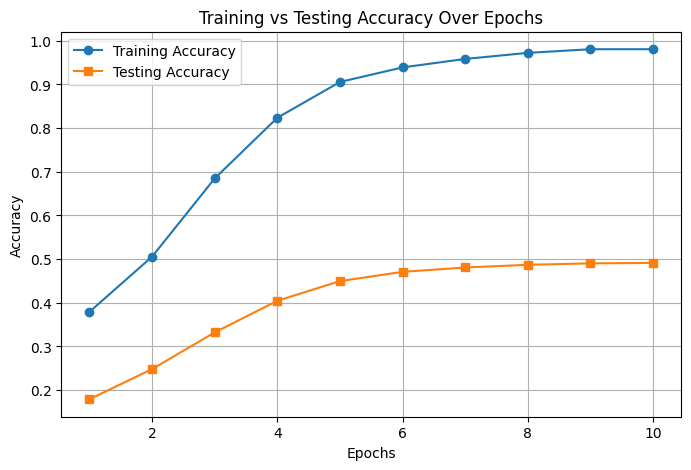

In [13]:
model, train_accuracies, test_accuracies = supervisedModel(X_train, X_test, y_test, y_train, epochs=10, batch_size=500)
graphAccuracies(train_accuracies, test_accuracies)

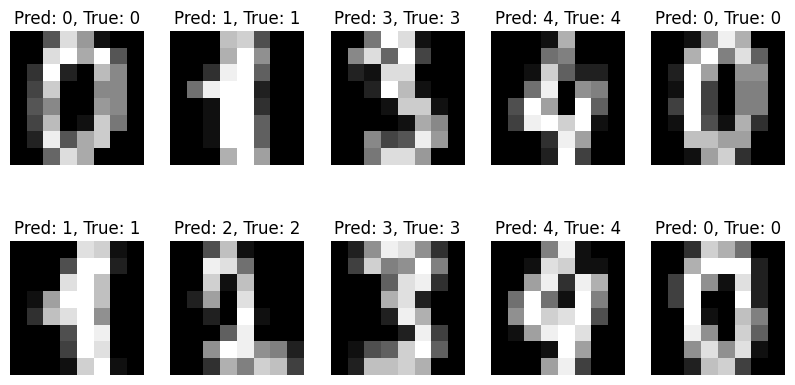

In [17]:
showCorrectPredictions(model, X_test, y_test)


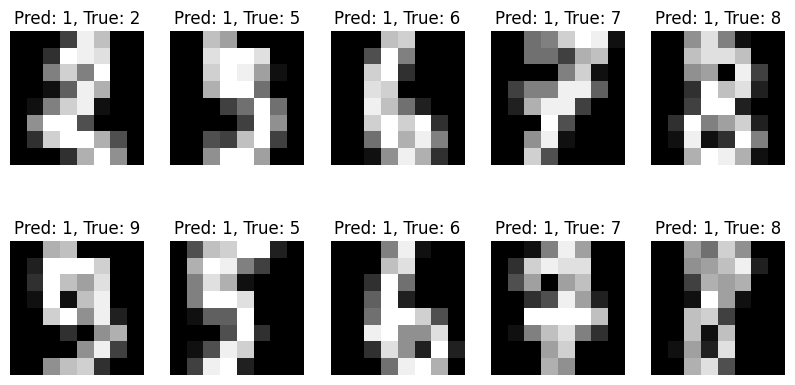

In [15]:
showIncorrectPredictions(model, X_test, y_test)

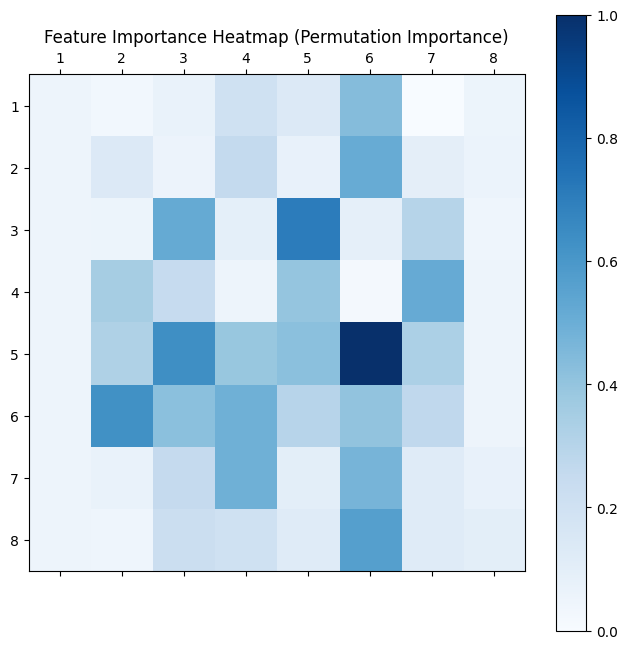

In [16]:
showFeatureImportance(model, X_test, y_test)